<a href="https://colab.research.google.com/github/FSP-1920118146/FSP-1920118146/blob/main/C1_23_B_20123019_Fernanda_Syah_Putra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers.csv
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


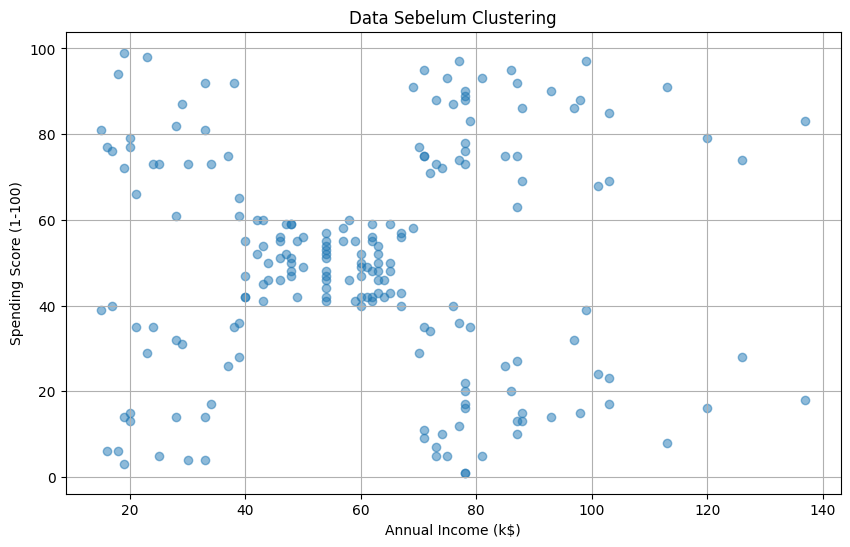

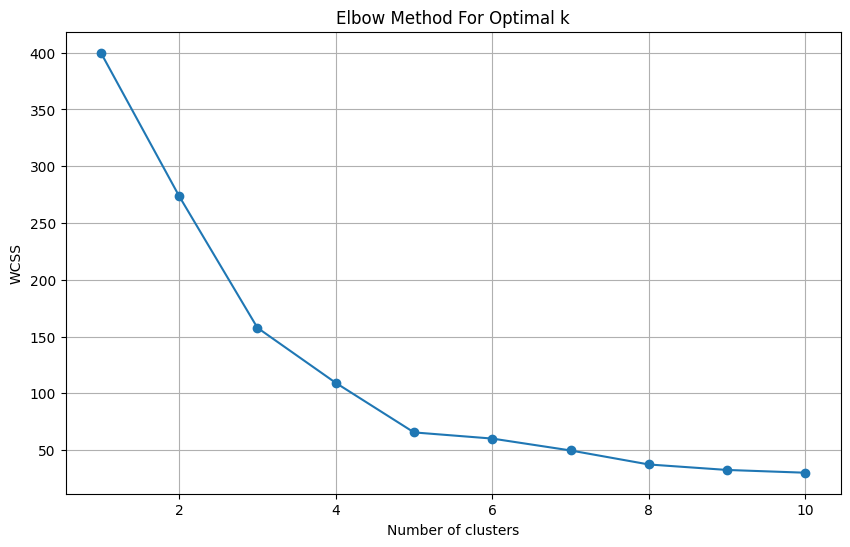

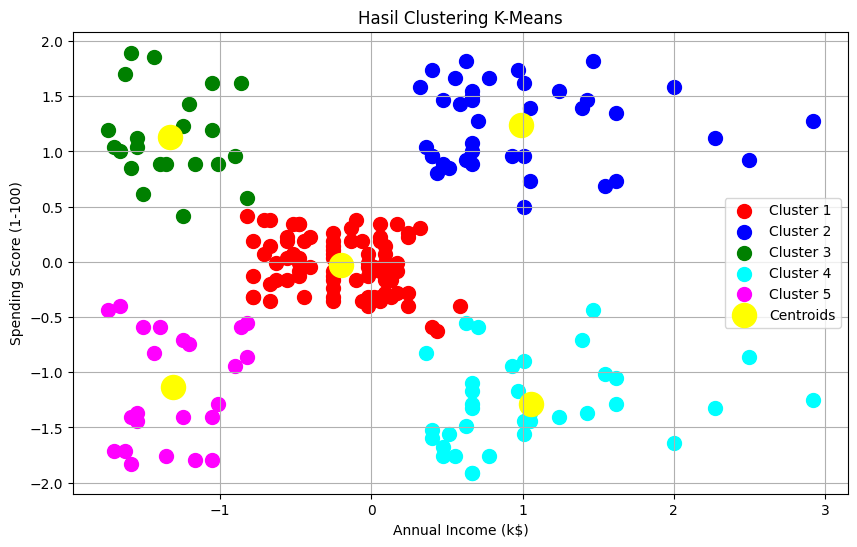

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 2. Upload File
from google.colab import files
uploaded = files.upload()

# 3. Baca Dataset dan Cek Awal Data
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

# 4. Ambil Fitur
# Mengambil fitur Annual Income dan Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# 5. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Tampilkan Data (sebelum clustering)
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], alpha=0.5)
plt.title('Data Sebelum Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

# 7. Tentukan Jumlah Cluster Dengan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# 8. Fitting K-Means Final Dengan K = 5
kmeans_final = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans_final.fit_predict(X_scaled)

# 9. Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# 10. Gambarkan Pusat Cluster
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
